# Import

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Load Dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

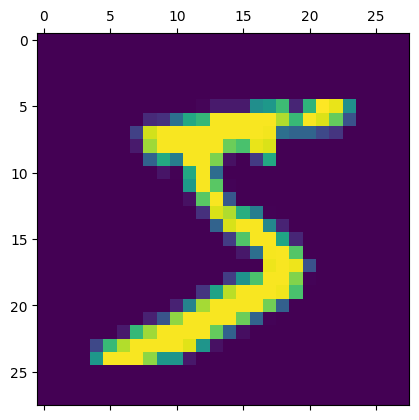

In [4]:
plt.matshow(X_train[0])

# Preprocessing

In [5]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

# Build, Compile & Fit NN model

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ])

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5


2023-04-16 03:46:43.232777: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 473us/step - loss: 9.7128 - accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 1s 460us/step - loss: 6.0795 - accuracy: 0.8770
Epoch 3/5
1875/1875 [==============================] - 1s 463us/step - loss: 5.8010 - accuracy: 0.8826
Epoch 4/5
1875/1875 [==============================] - 1s 468us/step - loss: 5.4715 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 1s 461us/step - loss: 5.5027 - accuracy: 0.8861


# Evaluate, Predict

In [9]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 366us/step - loss: 6.3613 - accuracy: 0.8927


[6.361258029937744, 0.8927000164985657]

In [10]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]

313/313 [==============================] - 0s 304us/step


Predicted Label:1


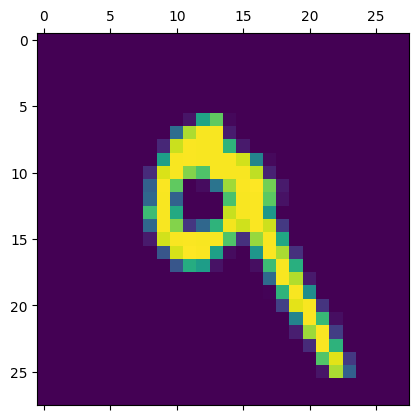

In [11]:
n = 7
plt.matshow(X_test[n])
print("Predicted Label:" + str(Y_predicted_labels[n]))

# Plot Confusion Matrix

In [12]:
cm = tf.math.confusion_matrix(Y_test, Y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

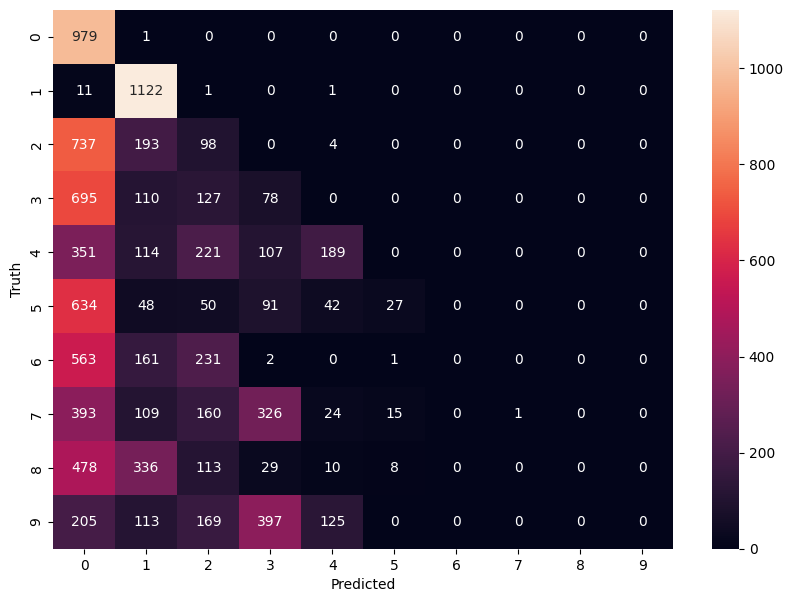

In [13]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Repeat with Scaled Data

In [14]:
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 544us/step - loss: 0.4716 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 1s 496us/step - loss: 0.3043 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 538us/step - loss: 0.2832 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 1s 542us/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 1s 488us/step - loss: 0.2667 - accuracy: 0.9254


In [16]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 465us/step - loss: 0.2643 - accuracy: 0.9269


[0.2643430829048157, 0.9269000291824341]

In [17]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

313/313 [==============================] - 0s 370us/step


[7, 2, 1, 0, 4]

Predicted Label:7


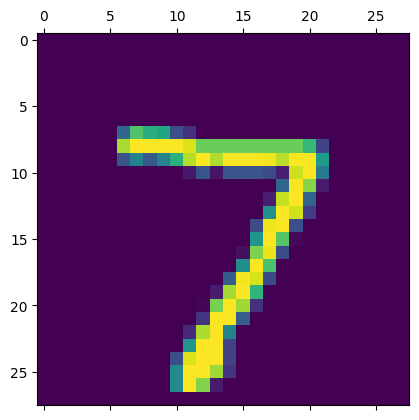

In [18]:
n = 0
plt.matshow(X_test[n])
print("Predicted Label:" + str(Y_predicted_labels[n]))

Text(95.72222222222221, 0.5, 'Truth')

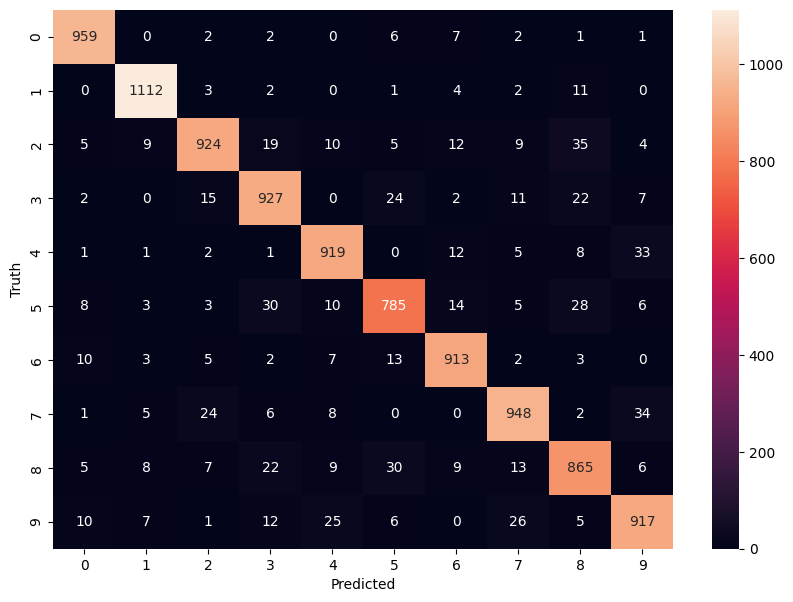

In [19]:
cm = tf.math.confusion_matrix(Y_test, Y_predicted_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Repeat with one hidden layer

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 771us/step - loss: 0.2762 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 1s 797us/step - loss: 0.1237 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 1s 743us/step - loss: 0.0876 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 1s 795us/step - loss: 0.0520 - accuracy: 0.9843


In [21]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 446us/step - loss: 0.0851 - accuracy: 0.9726


[0.0850563570857048, 0.972599983215332]

In [22]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

313/313 [==============================] - 0s 468us/step


[7, 2, 1, 0, 4]

Predicted Label:7


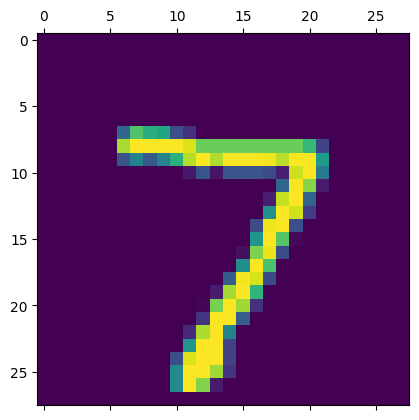

In [23]:
n = 0
plt.matshow(X_test[n])
print("Predicted Label:" + str(Y_predicted_labels[n]))

Text(95.72222222222221, 0.5, 'Truth')

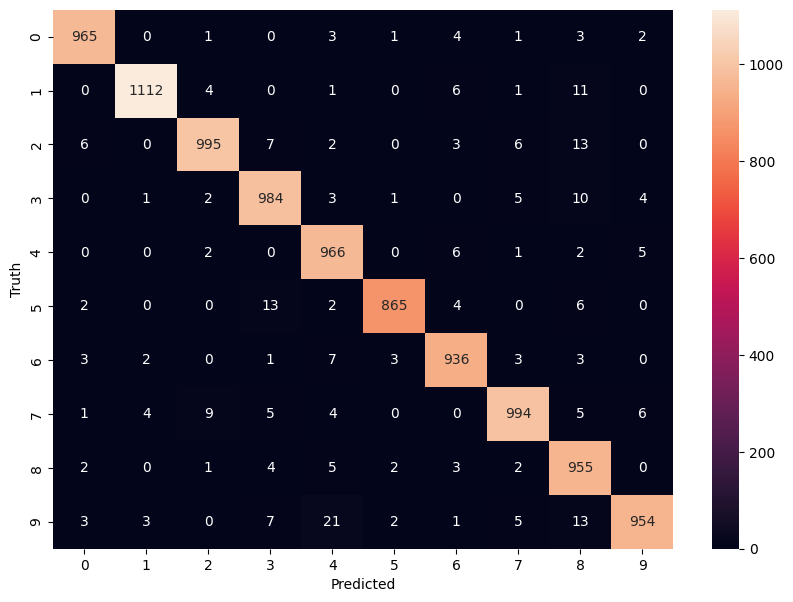

In [24]:
cm = tf.math.confusion_matrix(Y_test, Y_predicted_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model.save("NN_Digits_Classifier")

INFO:tensorflow:Assets written to: NN_Digits_Classifier/assets
